In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [2]:
this_dir = os.getcwd()

In [3]:
#For all SN now

SN_names = np.array(['1993J', '1996cb', '2001ig', '2003bg', '2007Y', '2008ax', '2008aq',
                     '2009K', '2011dh', '2011ei', '2011hs', '2013df', 'ASASSN-14az',
                     'iPTF13bvn', '2012P'])

compact_names = np.array(['2001ig', '2003bg', 'ASASSN14-az'])
extended_names = np.array(['1993J', '1996cb', '2007Y', '2008ax', '2008aq', '2009K',
                           '2011dh', '2011ei', '2011hs', '2012P', '2013df', 'iPTF13bvn'])


epochs_list = []
mags_list = []

for i in range(len(SN_names)):
    
    # Opening JSON file
    if SN_names[i] in ['ASASSN-14az', 'iPTF13bvn', 'PTF12os']:
        SN_name = SN_names[i]
    else:
        SN_name = 'SN' + SN_names[i]
    
    
    f = open(this_dir + '/SN_catalogue_LC/' + SN_name + '.json')

    # returns JSON object as 
    # a dictionary
    data = json.load(f)

    #Acces the photometry
    photometry = data[SN_name]["photometry"]

    bands = []
    epochs = []
    mags = []
    
    for j in range(len(photometry)): #Store all epochs and mags in Vband
        obs = photometry[j]
        
        try:
            bands.append(obs['band'])
        except:
            bands.append('V') #If there is no band indicated, assume it is V band
        
        try:
            if obs['band'] == 'C' and SN_name == 'SN2001ig':
                epochs.append(float(obs['time']))
                mags.append(float(obs['magnitude']))
                
            elif obs['band'] == 'g' and (SN_name == 'ASASSN-14az' or SN_name == 'SN2012P'):
                epochs.append(float(obs['time']))
                mags.append(float(obs['magnitude']))
                
            elif obs['band'] == 'V' and SN_name not in ['SN2001ig', 'ASASSN-14az', 'SN2012P']:
                epochs.append(float(obs['time']))
                mags.append(float(obs['magnitude']))
                
        except KeyError:
            pass
            
    #Normalise epochs and magnitudes to peak
    epochs, mags = np.array(epochs), np.array(mags)
    
    print(SN_name, len(epochs)/len(photometry), len(epochs))
    epochs = epochs - epochs[np.where(mags == np.min(mags))[0][0]] #make sure peak epoch == 0
    mags = mags - np.min(mags) #Set peak mag to 0
    
    if SN_name == 'SN1993J':
        epochs += 4
        mags -= 0.2
    elif SN_name == 'SN2013df':
        epochs -= 19
        mags -= 0.4
    elif SN_name == 'SN2001ig':
        epochs += 6
        mags -= 0.6
    
    epochs_list.append(np.array(epochs))
    mags_list.append(np.array(mags))
    # Closing file
    bands = np.array(bands)
    
    unique,pos = np.unique(bands,return_inverse=True) #Finds all unique elements and their positions
    counts = np.bincount(pos)                     #Count the number of each unique element
    print(unique, counts)
    maxpos = counts.argmax()                      #Finds the positions of the maximum count
    
    
    print('The most common band is: ', unique[maxpos], ', with a coverage of', '{:.0f}'.format(counts[maxpos]*100/len(bands)), '%')
    
    f.close()

SN1993J 0.249727965179543 459
['B' 'I' 'I1' 'I2' 'R' 'U' 'V'] [401 365  12  12 398 191 459]
The most common band is:  V , with a coverage of 25 %
SN1996cb 0.35714285714285715 45
['B' 'R' 'V'] [34 46 46]
The most common band is:  R , with a coverage of 37 %
SN2001ig 0.7446808510638298 35
['B' 'C' 'R' 'V'] [ 1 35  7  4]
The most common band is:  C , with a coverage of 74 %
SN2003bg 0.3150684931506849 23
['B' 'C' 'I' 'R' 'V'] [19  2 17 11 24]
The most common band is:  V , with a coverage of 33 %
SN2007Y 0.14682539682539683 37
['B' 'H' 'J' 'U' 'UVM2' 'UVW1' 'UVW2' 'V' 'Y' 'g' 'i' 'r' 'u'] [37 15 17 18 14 18 18 38 16 16 17 17 11]
The most common band is:  V , with a coverage of 15 %
SN2008ax 0.1469265367316342 98
['B' 'H' 'I' 'J' 'Ks' 'R' 'U' 'UVM2' 'UVW1' 'UVW2' 'V' "g'" "i'" "r'" "u'"
 "z'"] [ 76  32  33  33  36  41  28  10  19  12  98  32  60 104  29  24]
The most common band is:  r' , with a coverage of 16 %
SN2008aq 0.1589958158995816 38
['B' 'H' 'J' 'U' 'UVM2' 'UVW1' 'UVW2' 'V' 'Y' 'g

/tmp/ipykernel_10761/920311075.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(epochs_list[i], mags_list[i], marker = this_marker, c = colors[i], label = SN_names[i], alpha = alpha)


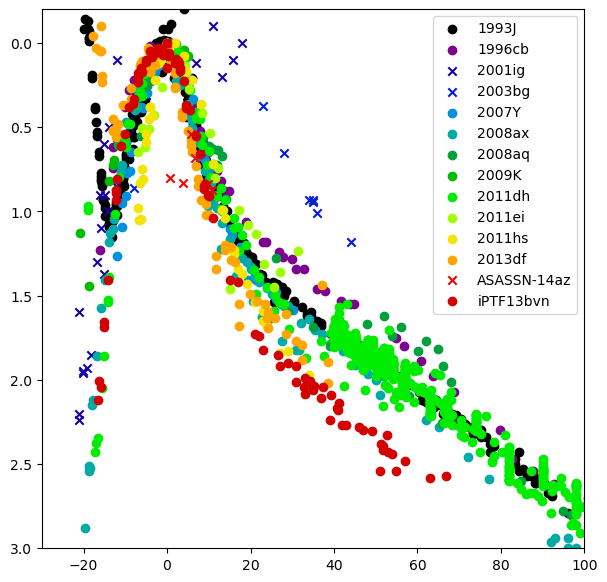

In [5]:
#Plot it up
fig, ax = plt.subplots(1, figsize = (7, 7))

colormap = plt.cm.nipy_spectral
colors = colormap(np.linspace(0, 1, len(SN_names)))
ax.set_prop_cycle('color', colors)

for i in range(len(SN_names)-1):
    
    if SN_names[i] in extended_names:
        this_marker = 'o'
        
        #colour = 'blue'
    else:
        this_marker = 'x'
        #colour = 'red'
        
    alpha = 0
    if SN_names[i] == '2003bg': #'ASASSN-14az'
        alpha = 1
    else:
        alpha = 1
        
    ax.scatter(epochs_list[i], mags_list[i], marker = this_marker, c = colors[i], label = SN_names[i], alpha = alpha)
    
ax.legend()
ax.set_xlim(-30, 100)
ax.set_ylim(-0.2, 3)
ax.invert_yaxis()
plt.show()